<a href="https://colab.research.google.com/github/Ela-Na/Content-Discovery/blob/main/1_NLP_from_scratch_NLP_Webinar_Notebook_Oct2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.nlpfromscratch.com?utm_source=notebook&utm_medium=nb-header&utm_campaign=2023-10-NLPWebinar"><center><img src="https://drive.google.com/uc?export=view&id=1-lt6Uft8lgBG9jPD0dO6w3dAcv_EUQRP"></center></a>

## Learn natural language processing. From A to Z. From zero to hero. Fast.

Copyright, NLP from scratch, 2023.

[nlpfromscratch.com](https://www.nlpfromscratch.com)

------------

# Webinar #1 - Zero to NLP in 60

## Introduction 🎬
In this notebook, we will rapidly through multiple areas in the field of natural language processing, and show it is easy to accomplish many of the common [NLP tasks](https://en.wikipedia.org/wiki/Natural_language_processing#Common_NLP_tasks) using the open source libraries that exist today and only a few simple lines of code!

This notebook is best run in [Google Colab](https://colab.research.google.com/), where the majority of dependencies are already installed. However, if you wish to run the notebook locally, please follow the [directions for setting up a local environment](https://drive.google.com/file/d/1EV1seK-dUHRCzj2EDuu3ETAhUyjzOGRd/view?usp=drive_link) and you may then download the notebook as a `.ipynb` and run in either Jupyter or Jupyterlab.

This notebook uses a number of helpful data science and machine learning libraries in addtion to base python, which come installed with Google Colab by default. These would need to be installed locally using `pip` or another python package manager if you are going to download and run this notebook outside of Colab. Notably, we will be using:

- The `requests` library, for retrieving data from online sources
- The `pandas` library, for data manipulation and working with structured data
- The `matplotlib` library, for visualizating data
- The `scikit-learn` library, for machine learning and text data preprocessing

## Working with Text in Python 🐍

Python is a great language to learn as it is easy to pick up even for the non-technical beginner with no prior programming experience. This is largely due to its simple syntax and structure. For natural language processing, working with text data is easy to do in modules included in base python, such as the `string` and `re` (regular expressions) modules. There is also extensive text processing capabilities built into the [pandas](https://pandas.pydata.org/docs/user_guide/text.html) data science library as we will see shortly.

For a simple example, let's first define a string in Python:

In [ ]:
my_string = "This is a string about applesauce."
print(my_string)

This is a string about applesauce.


In Jupyter, we can render text in the notebook using [Markdown](https://en.wikipedia.org/wiki/Markdown), using the Markdown class from the `IPython.display` module:

In [ ]:
from IPython.display import Markdown

Markdown(my_string)

This is a string about applesauce.

There, that looks a little better. Long strings can be defined in Python using the triple quote (`"""`) to open and close the string, and can span multiple lines:

In [ ]:
my_long_string = """This is my string of text data I'd like to work with. It contains letters, numbers such as 1234, punctuation \
such as commas, semicolons; other weird punctuation such as hashtags #, and also special characters such as \\n, \\r, and \\t, \
which represent linebreaks and tabs. I feel I should also mention applesauce."""

In [ ]:
Markdown(my_long_string)

This is my string of text data I'd like to work with. It contains letters, numbers such as 1234, punctuation such as commas, semicolons; other weird punctuation such as hashtags #, and also special characters such as \n, \r, and \t, which represent linebreaks and tabs. I feel I should also mention applesauce.

Every string variable in Python is not a primitive (such as in languages like C), but actually an object of the string class. They contain methods for common text-based operations. For example, we can change text case using `.upper`, `.lower`, and `title`:

In [ ]:
# Upper case
my_long_string.upper()

"THIS IS MY STRING OF TEXT DATA I'D LIKE TO WORK WITH. IT CONTAINS LETTERS, NUMBERS SUCH AS 1234, PUNCTUATION SUCH AS COMMAS, SEMICOLONS; OTHER WEIRD PUNCTUATION SUCH AS HASHTAGS #, AND ALSO SPECIAL CHARACTERS SUCH AS \\N, \\R, AND \\T, WHICH REPRESENT LINEBREAKS AND TABS. I FEEL I SHOULD ALSO MENTION APPLESAUCE."

In [ ]:
# Lower case
my_long_string.lower()

"this is my string of text data i'd like to work with. it contains letters, numbers such as 1234, punctuation such as commas, semicolons; other weird punctuation such as hashtags #, and also special characters such as \\n, \\r, and \\t, which represent linebreaks and tabs. i feel i should also mention applesauce."

In [ ]:
# Title case
my_long_string.title()

"This Is My String Of Text Data I'D Like To Work With. It Contains Letters, Numbers Such As 1234, Punctuation Such As Commas, Semicolons; Other Weird Punctuation Such As Hashtags #, And Also Special Characters Such As \\N, \\R, And \\T, Which Represent Linebreaks And Tabs. I Feel I Should Also Mention Applesauce."

We can also replace every occurrence of a substring within a given string with another substring, using the `.replace` method:

In [ ]:
my_long_string.replace("i", "_EYEBALL_")

"Th_EYEBALL_s _EYEBALL_s my str_EYEBALL_ng of text data I'd l_EYEBALL_ke to work w_EYEBALL_th. It conta_EYEBALL_ns letters, numbers such as 1234, punctuat_EYEBALL_on such as commas, sem_EYEBALL_colons; other we_EYEBALL_rd punctuat_EYEBALL_on such as hashtags #, and also spec_EYEBALL_al characters such as \\n, \\r, and \\t, wh_EYEBALL_ch represent l_EYEBALL_nebreaks and tabs. I feel I should also ment_EYEBALL_on applesauce."

To search for substrings within a given string, we can use the `find` method, to return the character index:

In [ ]:
my_long_string.find("applesauce")

299

We can also subset strings as though they are a list of characters:

In [ ]:
# Get characters 300 to 308 of the string
my_long_string[299:309]

'applesauce'

Finally, any serious data science work in done in Python would be using the pandas library 🐼. In pandas, we work with [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), which are like tables in Excel or in a database. Pandas has the `.str` accessor, which can efficiently apply any base string method to a column of data element-wise:

In [ ]:
import pandas as pd

# Create a sample DataFrame with customer IDs
data = {'Customer_ID': ['C123', 'C456', 'C789', 'C101'],
        'Product': ['Widget', 'Gadget', 'Widget', 'Doodad']}
text_df = pd.DataFrame(data)

# Show (before)
display(text_df)

# Applying the .replace() method using the .str accessor
text_df['Customer_Type'] = text_df['Customer_ID'].str.replace('C', 'Type ')

# Show (after)
display(text_df)

,Customer_ID,Product
0,C123,Widget
1,C456,Gadget
2,C789,Widget
3,C101,Doodad


,Customer_ID,Product,Customer_Type
0,C123,Widget,Type 123
1,C456,Gadget,Type 456
2,C789,Widget,Type 789
3,C101,Doodad,Type 101


## Acquiring Data from an API 🌐

It is very simple to acquire data in python using the [requests library](https://requests.readthedocs.io/en/latest/) and we will show how using it, with a few simple lines of code, we can pull data from a web service (REST API).

<center><img src="https://drive.google.com/uc?export=download&id=1Yu44Gw_DR1-khFPiQb3eVzZfSBy55lM2"></center>

[The Cocktail DB](https://www.thecocktaildb.com/) is an open source database of cocktails and drinks from around the world, and their ingredients. It also has an API that is free to use for educational purposes.

Let's get some text data using the `requests` library, here a description of gin. The URL pattern for a given web service is up to its designer, and should be well documented. The Cocktail DB tells us to use the URL pattern `https://www.thecocktaildb.com/api/json/v1/1/search.php?i=<ingredient name>` in order to get information back on a drink ingredient.

First, we import the requests library, then simply make a request using the `get` method and the URL:

In [ ]:
# Import the requests library
import requests

# Make a call to the API
r = requests.get("https://www.thecocktaildb.com/api/json/v1/1/search.php?i=gin")

Let's check what was returned from our request. There are two ways to do this: the most straightforward is just to return using the `.text` attribute, which shows the contents of the response as an ordinary python string:

In [ ]:
# What are the contents
r.text

'{"ingredients":[{"idIngredient":"2","strIngredient":"Gin","strDescription":"Gin is a distilled alcoholic drink that derives its predominant flavour from juniper berries (Juniperus communis). Gin is one of the broadest categories of spirits, all of various origins, styles, and flavour profiles, that revolve around juniper as a common ingredient.\\r\\n\\r\\nFrom its earliest origins in the Middle Ages, the drink has evolved from a herbal medicine to an object of commerce in the spirits industry. Gin emerged in England after the introduction of the jenever, a Dutch liquor which originally had been a medicine. Although this development had been taking place since early 17th century, gin became widespread after the William of Orange-led 1688 Glorious Revolution and subsequent import restrictions on French brandy.\\r\\n\\r\\nGin today is produced in subtly different ways, from a wide range of herbal ingredients, giving rise to a number of distinct styles and brands. After juniper, gin tends

We can see there is some nesting of data here, as the response is actually returned in [Javascript Object Notation (JSON) format ](https://en.wikipedia.org/wiki/JSON), or what someone who works in python might instead call a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries). We can see the resposne in JSON format as well using `.json` method of the response object:

In [ ]:
# Convert to JSON and dict
r.json()

{'ingredients': [{'idIngredient': '2',
   'strIngredient': 'Gin',
   'strDescription': 'Gin is a distilled alcoholic drink that derives its predominant flavour from juniper berries (Juniperus communis). Gin is one of the broadest categories of spirits, all of various origins, styles, and flavour profiles, that revolve around juniper as a common ingredient.\r\n\r\nFrom its earliest origins in the Middle Ages, the drink has evolved from a herbal medicine to an object of commerce in the spirits industry. Gin emerged in England after the introduction of the jenever, a Dutch liquor which originally had been a medicine. Although this development had been taking place since early 17th century, gin became widespread after the William of Orange-led 1688 Glorious Revolution and subsequent import restrictions on French brandy.\r\n\r\nGin today is produced in subtly different ways, from a wide range of herbal ingredients, giving rise to a number of distinct styles and brands. After juniper, gin te

Now to pull out the description, it is a matter of subsetting the returned list associated with the `ingredients` key (there is only one element, element 0) and the getting the value associated with the `strDescription` key within it. We will use the `Markdown` class from `iPython` to display the returned next nicely and render it as markdown:

In [ ]:
from IPython.display import Markdown

description = r.json()['ingredients'][0]['strDescription']

# Display in markdown
display(Markdown("---"))
display(Markdown(description))
display(Markdown("---"))

---

Gin is a distilled alcoholic drink that derives its predominant flavour from juniper berries (Juniperus communis). Gin is one of the broadest categories of spirits, all of various origins, styles, and flavour profiles, that revolve around juniper as a common ingredient.

From its earliest origins in the Middle Ages, the drink has evolved from a herbal medicine to an object of commerce in the spirits industry. Gin emerged in England after the introduction of the jenever, a Dutch liquor which originally had been a medicine. Although this development had been taking place since early 17th century, gin became widespread after the William of Orange-led 1688 Glorious Revolution and subsequent import restrictions on French brandy.

Gin today is produced in subtly different ways, from a wide range of herbal ingredients, giving rise to a number of distinct styles and brands. After juniper, gin tends to be flavoured with botanical/herbal, spice, floral or fruit-flavours or often a combination. It is most commonly consumed mixed with tonic water. Gin is also often used as a base spirit to produce flavoured gin-based liqueurs such as, for example, Sloe gin, traditionally by the addition of fruit, flavourings and sugar.

---

Great! We have sucessfully retrieved some text from an API using `requests`. We could write more code to return more data programatically and stored in a data structure such as a list or pandas dataframe to work with in an NLP task:

In [ ]:
# List of ingredients for building request URLs
ingredients = ['gin', 'vodka', 'rum']

# Empty list to hold descriptions returned from API
description_list = list()

# Iterate over the ingredients
for ingredient in ingredients:

    # Make a call to the API
    r = requests.get(f"https://www.thecocktaildb.com/api/json/v1/1/search.php?i={ingredient}")

    # Pull out the description and append to the list
    description = r.json()['ingredients'][0]['strDescription']
    description_list.append({'ingredient':ingredient, 'description':description})

Now we have a list storing the description field from data returned from the API calls:

In [ ]:
description_list

[{'ingredient': 'gin',
  'description': 'Gin is a distilled alcoholic drink that derives its predominant flavour from juniper berries (Juniperus communis). Gin is one of the broadest categories of spirits, all of various origins, styles, and flavour profiles, that revolve around juniper as a common ingredient.\r\n\r\nFrom its earliest origins in the Middle Ages, the drink has evolved from a herbal medicine to an object of commerce in the spirits industry. Gin emerged in England after the introduction of the jenever, a Dutch liquor which originally had been a medicine. Although this development had been taking place since early 17th century, gin became widespread after the William of Orange-led 1688 Glorious Revolution and subsequent import restrictions on French brandy.\r\n\r\nGin today is produced in subtly different ways, from a wide range of herbal ingredients, giving rise to a number of distinct styles and brands. After juniper, gin tends to be flavoured with botanical/herbal, spic

Finally, we can plunk this into a [pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) to make things a bit nicer. Pandas plays nicely with data stored in dictionaries, so all we need to do is pass the returned JSON to `pd.DataFrame`. Nice!

In [ ]:
# Check ouput
import pandas as pd

# Create a pandas dataframe from the list of key-value pairs
# Keys are the column name, values are the values for each row
desc_df = pd.DataFrame(description_list)

# Check
desc_df.head()

,ingredient,description
0,gin,Gin is a distilled alcoholic drink that derive...
1,vodka,Vodka is a distilled beverage composed primari...
2,rum,Rum is a distilled alcoholic beverage made fro...


### Web Scraping with Pandas 🐼

[Web scraping](https://en.wikipedia.org/wiki/Web_scraping) refers to programmatically extracting data from web sites. Many times, the information we want may be "locked up" in a website intended to be viewed through a web browser, and we can extract it in an automated way using code.

<center><img src="https://drive.google.com/uc?export=download&id=1Z-na_aHnbos2AseN1SL3QY_6OqCnuIXp"></center>

If the data in a website is contained in a table, web scraping is as easy as calling `pd.read_html` on the HTML code, which will scrape all tables on the page and return their contents as a list.

For this example, we will be collecting weather data for the current forecast for the city of Toronto from the [Environment Canada](https://weather.gc.ca/city/pages/on-143_metric_e.html) website.

Here we will first get the page code using `requests`, then read the table using pandas:

In [ ]:
# Get the page code by requesting the web site
# Here we are hitting the weather for Toronto, Ontario from Government of Canada website
r = requests.get('https://weather.gc.ca/city/pages/on-143_metric_e.html')

# Read the tables from the page code
tables = pd.read_html(r.text)

We can see that pandas has returned a list of tables:

In [ ]:
type(tables)

list

And that there are actually two tables in the page:

In [ ]:
len(tables)

2

Let's take a look at the first element in the list. Pandas scrapes conveniently scrapes each table in the page into a dataframe:

In [ ]:
display(tables[0])

,Date,Detailed Forecast
0,Tonight,Partly cloudy with 30 percent chance of shower...
1,"Thu, 12 Oct",A mix of sun and cloud. 30 percent chance of s...
2,Night,Clear. Low 6.
3,"Fri, 13 Oct",Cloudy. High 14.
4,Night,Showers. Low 7.
5,"Sat, 14 Oct",Showers. High 11.
6,Night,Cloudy with 40 percent chance of showers. Low 7.
7,"Sun, 15 Oct",Cloudy with 40 percent chance of showers. High...
8,Night,Cloudy with 30 percent chance of showers. Low 7.
9,"Mon, 16 Oct",Cloudy with 30 percent chance of showers. High...


## Preprocessing Text ⚙

We have now acquired some text data from online sources. Before using this text in application of NLP - for example, in applying machine leanring - we first need to preprocess the data. Note that this is required to apply traditional natural language processing techniques, however is not as hard-and-fast a requirement for modern modeling approaches such as those based on deep learning and for using large language models (LLMs) which have the advantage of more sophisticated tokenization methods.

Major steps in preprocessing text are:
- **Normalization**: addressing case, removing punctuation and stop words, stemming or lemmatization
- **Tokenization**: breaking up into individual units of language into *tokens*b, usually words
- **Vectorization**: converting tokens to structured numeric data

For the following, we will use the description we acquired from the CocktailDB earlier in this notebook:

In [ ]:
raw_text = description_list[1]['description']

# Show first 1000 characters
display(raw_text[0:1000])

'Vodka is a distilled beverage composed primarily of water and ethanol, sometimes with traces of impurities and flavorings. Traditionally, vodka is made by the distillation of fermented cereal grains or potatoes, though some modern brands use other substances, such as fruits or sugar.\r\n\r\nSince the 1890s, the standard Polish, Russian, Belarusian, Ukrainian, Estonian, Latvian, Lithuanian and Czech vodkas are 40% alcohol by volume ABV (80 US proof), a percentage that is widely misattributed to Dmitri Mendeleev. The European Union has established a minimum of 37.5% ABV for any "European vodka" to be named as such. Products sold as "vodka" in the United States must have a minimum alcohol content of 40%. Even with these loose restrictions, most vodka sold contains 40% ABV. For homemade vodkas and distilled beverages referred to as "moonshine", see moonshine by country.\r\n\r\nVodka is traditionally drunk neat (not mixed with any water, ice, or other mixer), though it is often served chil

We can see there are a number of special characters for formatting purposes, such as newline (`\n`) and carriage return (`\r`) characters. These are displayed when showing with the text via `print` as oppposed to `display`:

In [ ]:
print(raw_text[0:1000])

Vodka is a distilled beverage composed primarily of water and ethanol, sometimes with traces of impurities and flavorings. Traditionally, vodka is made by the distillation of fermented cereal grains or potatoes, though some modern brands use other substances, such as fruits or sugar.

Since the 1890s, the standard Polish, Russian, Belarusian, Ukrainian, Estonian, Latvian, Lithuanian and Czech vodkas are 40% alcohol by volume ABV (80 US proof), a percentage that is widely misattributed to Dmitri Mendeleev. The European Union has established a minimum of 37.5% ABV for any "European vodka" to be named as such. Products sold as "vodka" in the United States must have a minimum alcohol content of 40%. Even with these loose restrictions, most vodka sold contains 40% ABV. For homemade vodkas and distilled beverages referred to as "moonshine", see moonshine by country.

Vodka is traditionally drunk neat (not mixed with any water, ice, or other mixer), though it is often served chilled in th


We will need to **remove these special characters** part of preprocessing. Here we will replace them with with spaces:

In [ ]:
# Remove tabs and newlines
text = raw_text.replace("\t", " ").replace("\n", " ").replace("\r"," ")

# Remove multiple spaces - requires regex
import re
text = re.sub(' +', ' ', text)

display(text[0:1000])

'Vodka is a distilled beverage composed primarily of water and ethanol, sometimes with traces of impurities and flavorings. Traditionally, vodka is made by the distillation of fermented cereal grains or potatoes, though some modern brands use other substances, such as fruits or sugar. Since the 1890s, the standard Polish, Russian, Belarusian, Ukrainian, Estonian, Latvian, Lithuanian and Czech vodkas are 40% alcohol by volume ABV (80 US proof), a percentage that is widely misattributed to Dmitri Mendeleev. The European Union has established a minimum of 37.5% ABV for any "European vodka" to be named as such. Products sold as "vodka" in the United States must have a minimum alcohol content of 40%. Even with these loose restrictions, most vodka sold contains 40% ABV. For homemade vodkas and distilled beverages referred to as "moonshine", see moonshine by country. Vodka is traditionally drunk neat (not mixed with any water, ice, or other mixer), though it is often served chilled in the vod

Next we will standardize the text be converting everything to **lowercase**:

In [ ]:
# Change case to lower
text = text.lower()
display(text[0:1000])

'vodka is a distilled beverage composed primarily of water and ethanol, sometimes with traces of impurities and flavorings. traditionally, vodka is made by the distillation of fermented cereal grains or potatoes, though some modern brands use other substances, such as fruits or sugar. since the 1890s, the standard polish, russian, belarusian, ukrainian, estonian, latvian, lithuanian and czech vodkas are 40% alcohol by volume abv (80 us proof), a percentage that is widely misattributed to dmitri mendeleev. the european union has established a minimum of 37.5% abv for any "european vodka" to be named as such. products sold as "vodka" in the united states must have a minimum alcohol content of 40%. even with these loose restrictions, most vodka sold contains 40% abv. for homemade vodkas and distilled beverages referred to as "moonshine", see moonshine by country. vodka is traditionally drunk neat (not mixed with any water, ice, or other mixer), though it is often served chilled in the vod

**Removing puncutation** is a little more involved. Luckily we can do this using the `string` module which is built into python. This contains a special string, `punctuation`, which is all punctuation marks:

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

We can iterate over each punctuation mark by treating the string as a list of characters, then replace each occurrence of the punctuation mark with the empty character (`""`):

In [ ]:
# Removing punctuation
for mark in string.punctuation:
    text = text.replace(mark, "")

text

'vodka is a distilled beverage composed primarily of water and ethanol sometimes with traces of impurities and flavorings traditionally vodka is made by the distillation of fermented cereal grains or potatoes though some modern brands use other substances such as fruits or sugar since the 1890s the standard polish russian belarusian ukrainian estonian latvian lithuanian and czech vodkas are 40 alcohol by volume abv 80 us proof a percentage that is widely misattributed to dmitri mendeleev the european union has established a minimum of 375 abv for any european vodka to be named as such products sold as vodka in the united states must have a minimum alcohol content of 40 even with these loose restrictions most vodka sold contains 40 abv for homemade vodkas and distilled beverages referred to as moonshine see moonshine by country vodka is traditionally drunk neat not mixed with any water ice or other mixer though it is often served chilled in the vodka belt countries belarus estonia finla

Now we will turn to usage of the Natural Language Toolkit, or [NLTK](https://www.nltk.org/) library for **removing stop words**. [Stop words](https://en.wikipedia.org/wiki/Stop_word) are words which are not of interest in NLP as they don't possess particular meaning on their own. These are usually the syntatic "glue" which make up a language (in this case, English). We can take a look at the stopword list included in NLTK by importing it from the `corpus` module:

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


We've already removed punctuation, so now let's do the same for the stopwords. First we will store the stopwords list in a variable.

In [ ]:
mystopwords = stopwords.words('english')

In this step, we'll need to **tokenize the text**, then go through and remove each word which appears in the stopword list. Tokenizing is nothing more than breaking the text down into "units" of language. The simplest approach is to treat each word as a token, so here we will just split on whitespace, *i.e.* the `_` character:

In [ ]:
# Tokenize
tokens = text.split(' ')

# How many tokens are there?
len(tokens)

627

We can see that in our description of vodka, there are 627 tokens in total. Let's take a look at some of them:

In [ ]:
print(tokens[0:100])

['vodka', 'is', 'a', 'distilled', 'beverage', 'composed', 'primarily', 'of', 'water', 'and', 'ethanol', 'sometimes', 'with', 'traces', 'of', 'impurities', 'and', 'flavorings', 'traditionally', 'vodka', 'is', 'made', 'by', 'the', 'distillation', 'of', 'fermented', 'cereal', 'grains', 'or', 'potatoes', 'though', 'some', 'modern', 'brands', 'use', 'other', 'substances', 'such', 'as', 'fruits', 'or', 'sugar', 'since', 'the', '1890s', 'the', 'standard', 'polish', 'russian', 'belarusian', 'ukrainian', 'estonian', 'latvian', 'lithuanian', 'and', 'czech', 'vodkas', 'are', '40', 'alcohol', 'by', 'volume', 'abv', '80', 'us', 'proof', 'a', 'percentage', 'that', 'is', 'widely', 'misattributed', 'to', 'dmitri', 'mendeleev', 'the', 'european', 'union', 'has', 'established', 'a', 'minimum', 'of', '375', 'abv', 'for', 'any', 'european', 'vodka', 'to', 'be', 'named', 'as', 'such', 'products', 'sold', 'as', 'vodka', 'in']


Now let's take a look at the most frequently occurring tokens, before and after removing stopwords.

We will create a second list of tokens with the stop words removed. For both lists, we will put them into a pandas `Series`, then count the most frequently occuring words with `value_counts`, look at the 10 most frequently occuring using `nlargest`, and finally visualize the result with a call to `plot`:

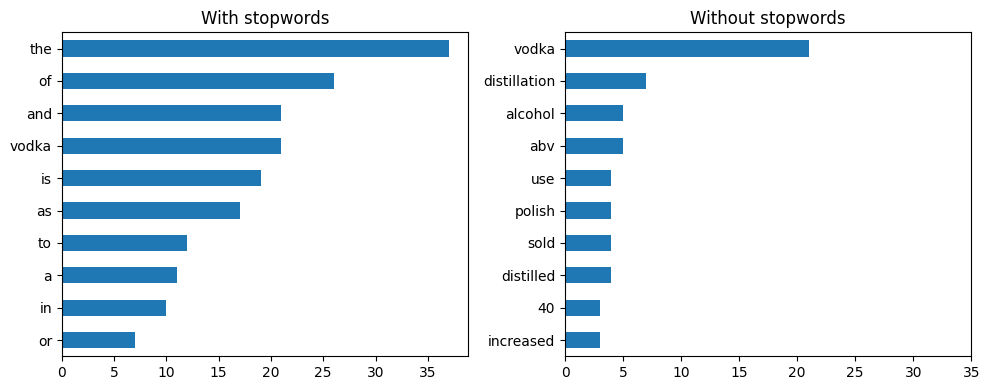

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### REMOVE STOPWORDS
# Create an empty list
trimmed_tokens = list()

# Iterate over each token, it is not a stopword, add it to the new (trimmed) list
for token in tokens:
    if token not in stopwords.words('english'):
        trimmed_tokens.append(token)

### CONVERT TO SERIES
tokens_series = pd.Series(tokens)
trimmed_tokens_series = pd.Series(trimmed_tokens)

### PLOT
plt.subplots(1,2, figsize=(10, 4))
plt.subplot(1,2,1)
tokens_series.value_counts().nlargest(10).sort_values().plot(kind='barh')
plt.xticks(np.arange(0, 40, 5))
plt.title('With stopwords')
plt.subplot(1,2,2)
trimmed_tokens_series.value_counts().nlargest(10).sort_values().plot(kind='barh')
plt.xticks(np.arange(0, 40, 5))
plt.title('Without stopwords')
plt.tight_layout()
plt.show()

As we can see on the left, stopwords make up the majority of the text. When these are removed, the subject matter of the document becomes much clearer with the remaining words which are the content of what the passage of text is about.

### Vectorizing Text 🔢

In the above section we preprocessed text and vectorized using simple tokenization with the space `_` character. Is there a faster way?

Yes, [scikit-learn](https://scikit-learn.org/stable/), the standard open source python library for machine learning, has powerful text processing built-in, and we can tokenize our text and remove stopwords together in one go using the different built-in [vectorizers](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text) in the `feature_extraction.text` submodule.

First, we will apply count vectorization, which is nothing more than counting the number of occurrences of each token in a passage of text:

In [ ]:
display(text[0:1000])

'vodka is a distilled beverage composed primarily of water and ethanol sometimes with traces of impurities and flavorings traditionally vodka is made by the distillation of fermented cereal grains or potatoes though some modern brands use other substances such as fruits or sugar since the 1890s the standard polish russian belarusian ukrainian estonian latvian lithuanian and czech vodkas are 40 alcohol by volume abv 80 us proof a percentage that is widely misattributed to dmitri mendeleev the european union has established a minimum of 375 abv for any european vodka to be named as such products sold as vodka in the united states must have a minimum alcohol content of 40 even with these loose restrictions most vodka sold contains 40 abv for homemade vodkas and distilled beverages referred to as moonshine see moonshine by country vodka is traditionally drunk neat not mixed with any water ice or other mixer though it is often served chilled in the vodka belt countries belarus estonia finla

To vectorize the text, we import the `CountVectorizer` class from the `sklearn.feature_extraction.text` submodule, create an instance of it, then pass it the data and fit and transform the text. Not that all we need to do to remove stop words here is to pass the argument `stop_words="english"` to the `CountVectorizer`:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate and tell to remove stopwords
cv = CountVectorizer(stop_words='english')

# Fit and transform
vectorized = cv.fit_transform([text])
vectorized

<1x258 sparse matrix of type '<class 'numpy.int64'>'
	with 258 stored elements in Compressed Sparse Row format>

We can see this has returned a sparse matrix, since the data you are working with in NLP is normally assumed to be large. Let's take a look at the "dense" representation, and see what the `CountVectorizer` has actually done:

In [ ]:
print(vectorized.todense())

[[ 1  1  1  1  1  3  1  1  1  1  3  2  1  1  5  1  1  1  1  1  1  5  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  2  1
   1  1  1  1  1  1  1  1  1  1  7  4  1  1  1  1  1  1  1  1  1  1  1  1
   1  3  2  1  2  1  1  1  1  2  2  2  1  1  2  1  1  2  1  1  1  1  1  2
   1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1
   1  1  1  1  1  2  1  2  1  1  1  1  1  1  1  1  1  1  1  2  1  2  1  1
   1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  4  1  1  1  1  1  2  1
   1  1  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1
   4  2  1  1  2  1  1  1  2  1  1  3  2  1  1  1  1  1  1  1  1  2  1  1
   1  1  2  2  4  2  1  1  1 21  1  3  1  3  1  1  1  1]]


We can see that we now have an array of numbers instead of text! This is the *vectorized* form of the text data, where each number corresponds to a count of the number of time that token occurs in our text. This process of vectorization has transformed text data into numeric data the computer can understand and do computations with, such as fitting a machine learning model.

Putting this into a dataframe with the feature (token) names from the `CountVectorizer` makes things much clearer, about what each number actually represents:

In [ ]:
row = pd.DataFrame(vectorized.todense()[0], columns=cv.get_feature_names_out())
row

,14,176,1890s,192,375,40,80,88,8th,90,...,varieties,vodka,vodkaproducing,vodkas,volume,water,whiskey,white,widely,wine
0,1,1,1,1,1,3,1,1,1,1,...,1,21,1,3,1,3,1,1,1,1


We can see that the result is a single row of data (for our single document we passed in, the passage of text on vodka) and each column corresponds to a single unique token that occurred in that document. The number for each column represents the number of occurrences of that token.

So as before, albeit with much less code, we now have a count of the number of times each word occurs with the stopwords removed, and we can plot the most frequently occurring words:

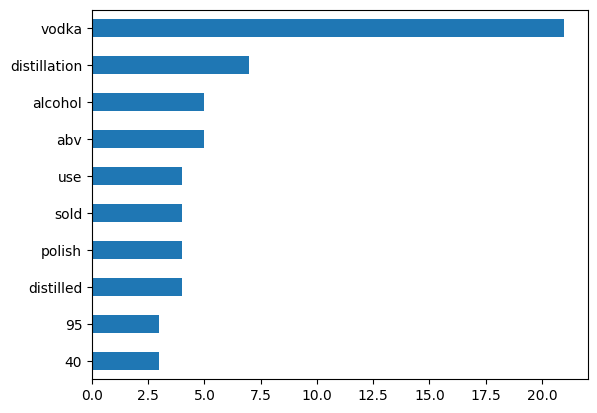

In [ ]:
# Plot as before
row.T[0].nlargest(10).sort_values().plot(kind='barh')
plt.show()

## Machine Learning for Sentiment Analysis 🤖🧠😀

Here we will be apply supervised learning machine learning to a sentiment analysis problem by training a model on labelled data. In particular, we will training one of the simplest types of models, [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression), a type of linear classifier.  First we will load and preprocess a labelled text dataset, then fit and use this simple linear model for the binary classification task of positive and negative sentiment.

Here we be working a random 10% sample of the [Large Movie Review Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews), a set of 50,000 "highly polar" movie reviews collected from the [Internet Movie Database](https://www.imdb.com).

First, we'll read in the data:

In [ ]:
import pandas as pd

# Download the file from Google Drive
reviews_df = pd.read_csv('https://raw.githubusercontent.com/nlpfromscratch/datasets/master/imdb/imdb_reviews_sample.csv')

As before, we'll need to preprocess our data before we do machine learning. Let's take a look at the data and see what we are working with:

In [ ]:
# How many reviews?
reviews_df.shape

(5000, 2)

Here we are working with 5,000 movie reviews with two columns of data for each record. Let's take a look at a sample of the data:

In [ ]:
reviews_df.head()

,review,sentiment
0,Valley Girl is an exceptionally well made film...,1
1,This is one of those inoffensive and mildly en...,0
2,I really wanted to like this movie - the locat...,0
3,I attended the premier last night. The movie s...,0
4,The Deadly Wake is THE PERFECT MOVIE for film ...,0


We can see that the there are two columns, the free-form text in the column `review`, and the sentiment class label in the column `sentiment`, with a zero (0) for negative reviews and one (1) for positive reviews. We can also see that we'll need to do some text preprocessing, as there are different letter cases and punctuation present in the review text:

In [ ]:
# First 1K characters of the first review
display(reviews_df['review'][0][0:1000])

'Valley Girl is an exceptionally well made film with an all-around great cast. Even though the dialogue is a bit dated now, when the movie was released it was very hip. To this day, I know many people (teenagers included) that cannot form a sentence without using the word "like". That is without a doubt the legacy this movie will leave. A rating of 8 was given for this, like, most excellent movie.'

Because we have already covered preprocessing above, we will gloss over the details here and apply the necessary steps all at once. Only here now, we are applying the preprocessing steps to all documents (reviews) in our corpus, instead of a single piece of text.

In [ ]:
# Make a copy of the original dataframe
processed_df = reviews_df.copy()

# Change everything to lowercase
processed_df['review'] = processed_df['review'].str.lower()

# Remove punctuation with regular expression
processed_df['review'] = processed_df['review'].str.replace(r'[^\w\s]+', '')

# Check
processed_df.head()

<ipython-input-44-8988d84c8c5e>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  processed_df['review'] = processed_df['review'].str.replace(r'[^\w\s]+', '')


,review,sentiment
0,valley girl is an exceptionally well made film...,1
1,this is one of those inoffensive and mildly en...,0
2,i really wanted to like this movie the locati...,0
3,i attended the premier last night the movie st...,0
4,the deadly wake is the perfect movie for film ...,0


Now we have normalized all 5K movie reviews with only a few lines of code!

Let's check the result on the first movie review:

In [ ]:
# Check
processed_df['review'][0][0:1000]

'valley girl is an exceptionally well made film with an allaround great cast even though the dialogue is a bit dated now when the movie was released it was very hip to this day i know many people teenagers included that cannot form a sentence without using the word like that is without a doubt the legacy this movie will leave a rating of 8 was given for this like most excellent movie'

Looks good, now we can apply vectorization via sklearn, to get numeric data suitable for machine learning, as we did in the previous section:

In [ ]:
# Apply count vectorization and remove stopwords
# Use the min_df parameter to only keep tokens which appear in at least 1% of documents (50 reviews or more)
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', min_df=0.01)
X = cv.fit_transform(reviews_df['review'])
X

<5000x1565 sparse matrix of type '<class 'numpy.int64'>'
	with 269110 stored elements in Compressed Sparse Row format>

We can see that we have a 5,000 row dataframe with 1,565 columns - which are the features made up of the token counts. Before we only had a single row of data returned, but now we have 5000 rows, 1 for each movie review. This matrix is sparse, so let's convert it to a nice dataframe for convenience. We will also use the tokens stored in the count vectorizer as the feature names to be the column names as seen previously:

In [ ]:
X = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

# Check
X.head()

,10,100,11,12,13,15,20,30,40,50,...,wrong,wrote,yeah,year,years,yes,york,young,younger,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that the dataframe is mostly zeros, as most tokens only appear in a very small number of reviews. This matrix numerically describes each movie review. Here we will also pull out the `y` variable which will be our target for the binary classification task:

In [ ]:
y = processed_df['sentiment']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

We now have our preprocessed text data and an associated target, and so we are ready to fit a supervised machine learning model. Together these two will serve as our *training data* for a machine learning model. First we will split our data into a *training set* and a holdout or *test set* which the model does not see, in order to evaluate the performance of our model in an unbiased way. We can do this is in sklearn using the `train_test_split` method which is specifically for this purpose:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now we can fit our model. In scikit-learn, this is as easy as a few lines of code. We first import the `LogisticRegression` model class, then fit it on the training data, then call `.score`, passing in the training and test sets to get back accuracy scores.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
# Use max_iter for convergence, C value to prevent overfitting
logit = LogisticRegression(max_iter=2000, C=0.001)

# Fit the model
logit.fit(X_train, y_train)

# Display the scores on training and test set
display(logit.score(X_train, y_train))
display(logit.score(X_test, y_test))

0.822

0.792

Here we can see that are model is able to predict the sentiment of a movie review with ~80% accuracy! We could give the model a new movie review and see what its prediction is, assumming we performed the same preprocessing and count vectorization upon it first as we did to the training data.

What might be more interesting is doing some *model introspection*. Since positive sentiment is class 1, the model coefficients which are positive will be more predictive of positive sentiment, and those which are negative more predictive of negative sentiment.

We can take a look at the most predictive features (tokens) below with a few simple lines of code:

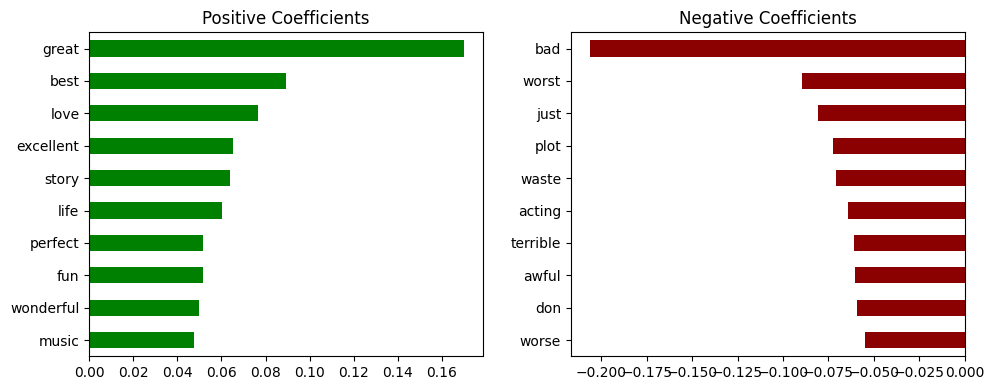

In [ ]:
# Pull out the coefficients and feature names
coef_series = pd.Series(logit.coef_[0], index=cv.get_feature_names_out())

# Plot
import matplotlib.pyplot as plt

plt.subplots(1,2, figsize=(10, 4))

# Positive
plt.subplot(1,2,1)
coef_series.nlargest(10).sort_values().plot(kind='barh', color='green')
plt.title('Positive Coefficients')

# Negative
plt.subplot(1,2,2)
coef_series.nsmallest(10).sort_values(ascending=False).plot(kind='barh', color='darkred')
plt.title('Negative Coefficients')

# Show
plt.tight_layout()
plt.show()

We can see that the words appearing in reviews with positive reviews are highly positive, and those in negative reviews are very negative as we would expect. Some tokens might warrant more further investigation into the data if they are nouns. The model has indeed learned something about the appearance of different tokens (words) and their effect on the sentiment of a movie review.

### Sentiment Analysis with an LLM and "Zero-shot" Learning 🎯

While specific models can be explicitly trained for sentiment scoring, many of the powerful, modern state-of-the-art [large language models](https://en.wikipedia.org/wiki/Large_language_model), or LLMs, are general enough that they can perform sentiment analysis tasks. Referred to as ["zero-shot" learning](https://en.wikipedia.org/wiki/Zero-shot_learning), though some LLMs have never been given explicit instructions in classifying sentiment, they nonetheless can do such a task given their broad knowledge base from the size of the data used in training. Furthermore, some general models for text generation or other tasks can be further fine-tuned on sentiment analysis specific tasks.

While we won't use any code in this section, let's take a look at the very popular [LLaMa v2 70B chat](https://huggingface.co/meta-llama/Llama-2-70b-chat-hf) model from Meta (Facebook) which was released recently in July of 2023.

<center><img src="https://drive.google.com/uc?export=download&id=1Z4NtnkYJ8TM1Z1gP2SUg2PPWoz9kZE3D"></center>

**Initial prompt:**
> Classify the sentiment of the following sentence as either negative (CLASS_0) or positive (CLASS_1): "I love absolutely applesauce, it's the best!"

**Follow-up prompt:**
<blockquote>
Could you do the same for the following sentences:

- "I hated this movie, it was the worst."
- "I loved this movie, it was the best."
- "Applesauce is ok, I guess, I don't mind it."
</blockquote>

Source: https://huggingface.co/spaces/ysharma/Explore_llamav2_with_TGI

## Conclusion 🏁

That concludes the webinar for today! I hope you've learned a lot about the fundamentals of natural language processing and what is possible with the tools available to us today, and only a few lines of code here or there.

I encourage you to further explore in the list of references and resources below, and to check out further opportunities for learning at https://www.nlpfromscratch.com/training.

Thanks for coming!

### References and Further Reading

- The Python Software Foundation. (2023, September 25). *Built-in Types: String Methods* https://docs.python.org/3/library/stdtypes.html#string-methods

- *Working with text data*. (n.d.). pandas via NumFOCUS, Inc. Retrieved September 26th, 2023. https://pandas.pydata.org/docs/user_guide/text.html#working-with-text-data

- *Requests: HTTP for Humans™*. (n.d.) Reitz, Kenneth & the `requests` authors. Retrieved September 26th, 2023. https://requests.readthedocs.io/en/latest/

- *Web scraping*. (n.d.). Wikipedia. Retrieved September 26th, 2023.  https://en.wikipedia.org/wiki/Web_scraping

- NLTK Project. (2023, January 2). *Natural Language Toolkit*. https://www.nltk.org/

- *Stop word*. (n.d.). Wikipedia. Retrieved September 26th, 2023. https://en.wikipedia.org/wiki/Stop_word

- *Working with text data*. (n.d.). scikit-learn developers. Retrieved September 26th, 2023. https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

----

<table border="0" bgcolor="white">
  <tr></tr>
  <tr>
      <th align="left" style="align:left; vertical-align: bottom;"><p>Copyright NLP from scratch, 2023.</p></th>
      <th aligh="right" width="33%"><a href="https://www.nlpfromscratch.com?utm_source=notebook&utm_medium=nb-footer-img&utm_campaign=2023-10-NLPWebinar"><img src="https://drive.google.com/uc?export=view&id=1-lt6Uft8lgBG9jPD0dO6w3dAcv_EUQRP"></th>
</tr>
</table>